In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-purchase-decision-dataset/car_data.csv


**start with EDA**

In [29]:
import pandas as pd
import seaborn as sns


In [30]:
df=pd.read_csv("/kaggle/input/cars-purchase-decision-dataset/car_data.csv")

In [31]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [32]:
df.shape

(1000, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [34]:
df.duplicated().sum()

0

In [35]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [36]:
df=df.drop('User ID',axis='columns')
df

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [37]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [38]:
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [39]:
df['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

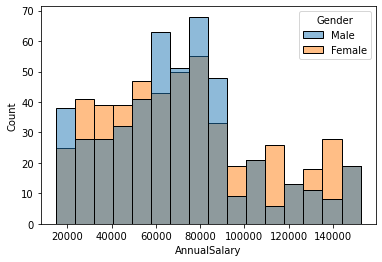

In [40]:
sns.histplot(x="AnnualSalary",data=df,hue="Gender")

<AxesSubplot:xlabel='Age', ylabel='Count'>

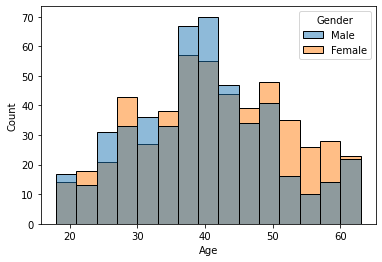

In [41]:
sns.histplot(x="Age",data=df,hue="Gender")

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

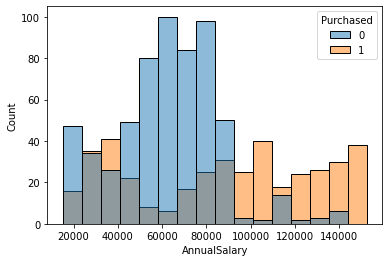

In [42]:
sns.histplot(x="AnnualSalary",data=df,hue="Purchased")

<AxesSubplot:xlabel='Age', ylabel='Count'>

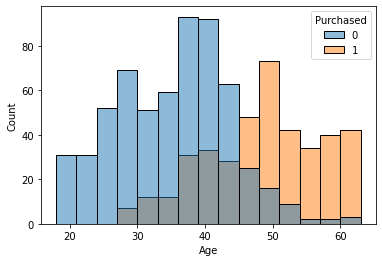

In [43]:
sns.histplot(x="Age",data=df,hue="Purchased")

In [44]:
df.corr()['Purchased'].sort_values()
# There's a correlation with age attribute

AnnualSalary    0.364974
Age             0.616036
Purchased       1.000000
Name: Purchased, dtype: float64

**Feature Engineering**

In [45]:
df=pd.get_dummies(df,drop_first=False)
df.head()

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,35,20000,0,0,1
1,40,43500,0,0,1
2,49,74000,0,0,1
3,40,107500,1,0,1
4,25,79000,0,0,1


In [46]:
df=df.drop("Gender_Male",axis='columns')

In [47]:
X=df[['AnnualSalary','Age','Gender_Female']].copy()

In [48]:
y=df[['Purchased']].copy()

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [56]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaled_X_trained=Scaler.fit_transform(X_train)
Scaled_X_test=Scaler.fit_transform(X_test)

In [57]:
from sklearn.metrics import accuracy_score


In [65]:
def modelperformance(predictions):
    print("Accuracy Score in model {}".format(accuracy_score(y_test,predictions)))

In [66]:
from sklearn.linear_model import LogisticRegression
Log_Reg=LogisticRegression()
Log_Reg.fit(Scaled_X_trained,y_train.values.ravel())
Log_predicitions=Log_Reg.predict(Scaled_X_test)
modelperformance(Log_predicitions)

Accuracy Score in model 0.81


In [72]:
from sklearn.neighbors import KNeighborsClassifier 
test_errors=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier (n_neighbors=k)
    knn_model.fit(Scaled_X_trained,y_train.values.ravel())
    knn_pred=knn_model.predict(Scaled_X_test)
    test_error_rate=1-accuracy_score(y_test,knn_pred)
    test_errors.append(test_error_rate)

In [70]:
import matplotlib.pyplot as plt

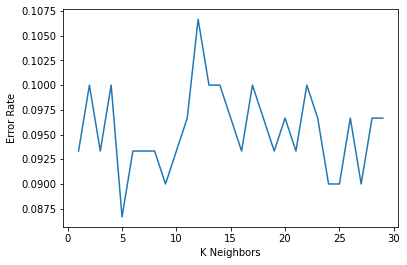

In [73]:
plt.plot(range(1,30),test_errors)
plt.xlabel("K Neighbors")
plt.ylabel("Error Rate")
plt.show()

In [84]:
knn_elbowmethod=KNeighborsClassifier (n_neighbors=5)
knn_elbowmethod.fit(Scaled_X_trained,y_train.values.ravel())
knn_elbowmethodpret=knn_elbowmethod.predict(Scaled_X_test)
modelperformance(knn_elbowmethodpret)

Accuracy Score in model 0.9133333333333333


In [82]:
# Applying GridSearch for finding the best parameters for the model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm=SVC()
param_grid_svr={'C':[0.01,0.1,0.5,1],'kernel':['linear','rbf','poly']}
gridsvr=GridSearchCV(svm,param_grid_svr)


In [83]:
gridsvr.fit(Scaled_X_trained,y_train.values.ravel())
pred_svr=gridsvr.predict(Scaled_X_test)
modelperformance(pred_svr)

Accuracy Score in model 0.89


In [86]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()
treemodel.fit(Scaled_X_trained,y_train.values.ravel())
tree_predict=treemodel.predict(Scaled_X_test)
modelperformance(tree_predict)

Accuracy Score in model 0.8833333333333333
